Case study on Supervised learning
Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris
species.(also do random forest algorithm

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataset to the python environment.

In [2]:
iris_df=pd.read_excel(r"C:\Users\HP\OneDrive\Desktop\iris (1).xls")

In [3]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris_df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Preprocess the dataset

In [7]:
iris_df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

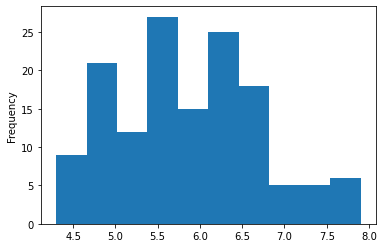

In [8]:
iris_df['SL'].plot(kind='hist')

In [9]:
iris_df['SL'].median()


5.8

In [10]:
iris_df['SL'].mode()

0    5.0
dtype: float64

In [11]:
iris_df["SL"].fillna(iris_df['SL'].median(), inplace = True) 

<AxesSubplot:ylabel='Frequency'>

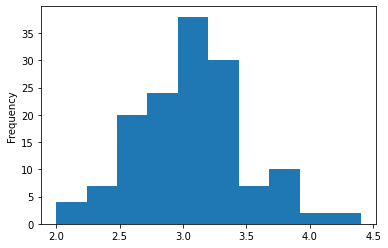

In [12]:
iris_df['SW'].plot(kind='hist')

In [13]:
iris_df['SW'].median()

3.0

In [14]:
iris_df['SW'].mean()

3.0493055555555566

In [15]:
iris_df["SW"].fillna(iris_df['SW'].median(), inplace = True) 

<AxesSubplot:ylabel='Frequency'>

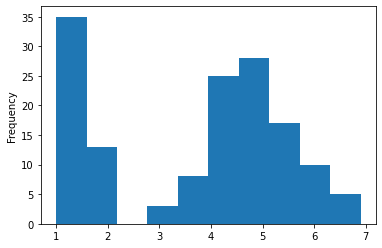

In [16]:
iris_df['PL'].plot(kind='hist')

In [17]:
iris_df['PL'].median()

4.35

In [18]:
iris_df['PL'].mean()

3.756250000000003

In [19]:
iris_df["PL"].fillna(iris_df['PL'].median(), inplace = True) 

In [20]:
iris_df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

# Lable Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()

In [22]:
a=['Classification']
for i in np.arange(len(a)):
      iris_df[a[i]]=label_en.fit_transform(iris_df[a[i]])
    

In [23]:
iris_df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
iris_df.shape

(150, 5)

In [25]:
# In this dataset there is 150 rows, 5 columns, 4 features and three labels in column 'Classification'

In [26]:
# Our problem is a Classification problem since our output predictor variable is a class.

# preparing the dataset


#droping the column 'Classification', which is the target variable from x axis and droping all columns except 'Classification'from y axis

In [27]:
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]


In [28]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int32

# splitting the data in to training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

In [31]:
x_train.shape

(105, 4)

In [32]:
y_train.shape

(105,)

In [33]:
x_test.shape

(45, 4)

In [34]:
y_test.shape

(45,)

# Finding the outliers

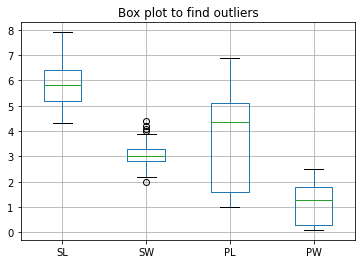

In [35]:
# Box Plot
import seaborn as sns


plt.title('Box plot to find outliers')
iris_df.boxplot(column=['SL','SW','PL','PW'], figsize=(15,5), grid=True)

plt.show()

In [36]:
#There seems to be some outliers in the column 'SW', which are to be removed

In [37]:
fare_mean = iris_df['SW'].median()
fare_std = iris_df['SW'].std()
low= fare_mean -(3 * fare_std)
high= fare_mean + (3 * fare_std)
SW_outliers = iris_df[(iris_df['SW'] < low) | (iris_df['SW'] > high)]
SW_outliers.head()

,SL,SW,PL,PW,Classification
15,5.7,4.4,1.5,0.4,0


In [38]:
Q1 = iris_df['SW'].quantile(0.25)
Q3 = iris_df['SW'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
iris_df['SW']=np.where(iris_df['SW']>upper_whisker,upper_whisker,np.where(iris_df['SW']<lower_whisker,lower_whisker,iris_df['SW']))


Text(0.5, 1.0, 'Boxplot of SW after filtering outliers')

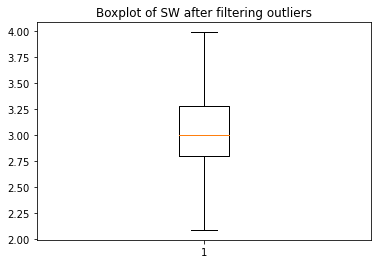

In [39]:
plt.boxplot(iris_df['SW'])
plt.title("Boxplot of SW after filtering outliers")

# Model Training

In [40]:
x= iris_df.drop(['Classification'],axis=1)
y=iris_df['Classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


In [41]:
x_train.shape

(120, 4)

# Logistic Rgression

In [42]:
from sklearn.linear_model import LogisticRegression  
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [44]:
print('Accuracy is',accuracy_score(y_test,y_pred)*100)


Accuracy is 100.0


In [45]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# KNN Classification

In [46]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [47]:
acc_values

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

Text(0, 0.5, 'accuracy')

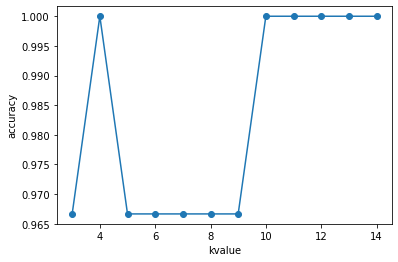

In [48]:
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [49]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=4)
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [50]:
acc_values

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Text(0, 0.5, 'accuracy')

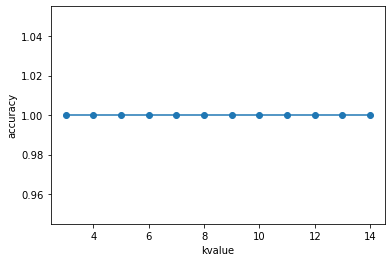

In [51]:
plt.plot(neighbors,acc_values,'-o')
plt.xlabel('kvalue')
plt.ylabel('accuracy')

In [52]:
print('Accuracy is',accuracy_score(y_test,y_pred)*100)

Accuracy is 100.0


In [53]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# standard scaling

In [54]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_train=Scaler.fit_transform(x_train)
x_test=Scaler.fit_transform(x_test)

In [55]:
from sklearn.linear_model import LogisticRegression  
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [57]:
print('Accuracy is',accuracy_score(y_test,y_pred)*100)


Accuracy is 96.66666666666667


In [58]:
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

In [59]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

# SVM Model

In [60]:
from sklearn.svm import SVC
from sklearn import metrics
model=SVC(gamma='scale')
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [61]:
print('Accuracy percentage: ',round(metrics.accuracy_score(y_test,prediction),2)*100)

Accuracy percentage:  97.0


In [62]:
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

In [63]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

#  RandomForestClassifier

In [64]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [66]:
print("Precision Score : ",precision_score(y_test, y_pred,                                           
                                           average='micro')*100)
print("Recall Score : ",recall_score(y_test, y_pred,                                           
                                           average='micro')*100)
print("f1_score : ",f1_score(y_test, y_pred,                             
                                           average='micro')*100) 


Precision Score :  96.66666666666667
Recall Score :  96.66666666666667
f1_score :  96.66666666666667


In [67]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 10]], dtype=int64)

In [68]:
#feature importance

In [69]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

PW    51.455406
PL    35.810006
SL     9.834542
SW     2.900046
dtype: float64

In [70]:
#The feature PW & PL have high feature importance and the feature SW is having low feature importance in defining the classification of species

In [71]:
#distribution of prediction probabilities

In [72]:
threshold=0.22
y_pred_prob=rf.predict_proba(x_test)[:,2]
y_pred=(y_pred_prob>threshold).astype(int)


In [73]:
f1_score(y_test,y_pred,average='micro')

0.3333333333333333

In [74]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 9,  0,  0],
       [ 0, 11,  0]], dtype=int64)

In [75]:
# The change in prediction prbability did not improve the model in this case

In [76]:
#fine tuning

In [77]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
rft=RandomForestClassifier(n_estimators=500,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

In [79]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [80]:
# Gradient boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [82]:
y_pred=gb.predict(x_test)
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

In [83]:
confusion_matrix(y_pred, y_test)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

# DecisionTreeRegressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
#Fit decision tree regressor to the dataset
x=iris_df.iloc[:,:-1]
y=iris_df.iloc[:,-1]

  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 42) 
  
# fit the regressor with X and Y data
regressor.fit(x, y)

DecisionTreeRegressor(random_state=42)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [86]:
f1_score(y_test,y_pred,average='micro')

0.9666666666666667

[Text(167.4, 199.32, 'X[3] <= 0.8\nsquared_error = 0.667\nsamples = 150\nvalue = 1.0'),
 Text(141.64615384615385, 163.07999999999998, 'squared_error = 0.0\nsamples = 50\nvalue = 0.0'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nsquared_error = 0.25\nsamples = 100\nvalue = 1.5'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nsquared_error = 0.084\nsamples = 54\nvalue = 1.093'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nsquared_error = 0.02\nsamples = 48\nvalue = 1.021'),
 Text(25.753846153846155, 54.359999999999985, 'squared_error = 0.0\nsamples = 47\nvalue = 1.0'),
 Text(77.26153846153846, 54.359999999999985, 'squared_error = 0.0\nsamples = 1\nvalue = 2.0'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nsquared_error = 0.222\nsamples = 6\nvalue = 1.667'),
 Text(128.76923076923077, 54.359999999999985, 'squared_error = 0.0\nsamples = 3\nvalue = 2.0'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nsquared_error = 0.222\nsamples = 3\nval

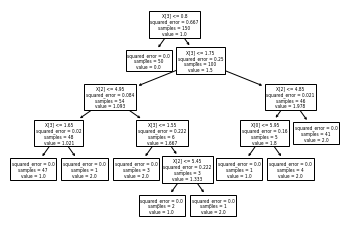

In [87]:
from sklearn import tree
tree.plot_tree(regressor) 

#Conclusion: Random Forest Classifier model seems to be giving 97% accuracy where as KNNClassfier and Logic Regression gives 100% accuracy